# StaTDS Tutorial: Regresion

Regression is a fundamental and widespread task in machine learning, primarily aimed at predicting continuous outcomes based on input features. From forecasting stock prices to estimating real estate values, regression algorithms are instrumental in converting raw data into predictive insights. In this tutorial, we will concentrate on comparing various regression algorithms to discern their strengths and weaknesses in diverse applications. This comparative analysis will provide a deeper understanding of how these algorithms perform under different scenarios, helping to choose the most suitable one for specific regression tasks.

## Dependency Installation




Before we start, it's crucial to set up our development environment by installing the necessary dependencies. If you're using Google Colab, you only need to install StaTDS.

In [1]:
pip install statds

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.0 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.0 which is incompatible.


## Evaluating Classification Algorithms: A Structured Approach


The evaluation process of classification algorithms can be structured into the following steps to ensure a rigorous and meaningful comparison. This task has become essential due to the wide variety of available algorithms and the impact of their parameters on performance.

1. Selection of Datasets and Algorithms: We begin by jointly selecting datasets and algorithms. This choice is critical as it defines the context and expectations of our comparative study.

2. Training and Evaluation of Algorithms: Each algorithm is trained on the selected datasets. This step is crucial in understanding how each algorithm performs with different data. Here, we also determine which metrics to study, knowing whether these are intended to be maximized or minimized.

3. Collection and Analysis of Metrics: The results from each algorithm-dataset combination are collected. We then conduct a preliminary analysis to identify trends and notable behaviors. This analysis helps us formulate hypotheses about the performance and characteristics of the algorithms.

4. Statistical Analysis: We proceed with conducting statistical tests on the gathered results. This step is vital to determine the presence of significant statistical differences between the algorithms and to ensure that our conclusions are solidly grounded.

5. Conclusion and Presentation of Results: Finally, we conclude our study with the presentation of our findings. Here, we synthesize our research, highlight key differences, and provide data-based recommendations.

![StepsEvaluate](https://media.discordapp.net/attachments/1179836822440902738/1179836868834119710/StepsEvaluate.png?ex=657b3bb5&is=6568c6b5&hm=6e753d5fe91a04bb6d407b99acc6f9a5302f9c36c455f6d8a7a8183fd1368dfc&=&format=webp&quality=lossless)


Each of these steps will be illustrated and detailed below, using a case example. This approach will facilitate tracking and replication in similar situations. Through this structured flow, we aim to provide a clear and reproducible methodology for comparing classification algorithms.

### Select Datasets and Algorithms

To ensure a practical and relevant analysis, we will select classification datasets from the UCI Machine Learning Repository, covering diverse domains such as biology, automotive industry, and air quality, among others. This practical approach will aid in illustrating how the characteristics of data can influence the selection and configuration of the appropriate classification algorithm.

In [2]:
datasets_list = {
    'Abalone': {"URL": 'https://archive.ics.uci.edu/static/public/1/abalone.zip', "index_target":-1},
    'Automobile': {"URL": 'https://archive.ics.uci.edu/static/public/10/automobile.zip', "index_target":-1},
    'Auto MPG': {"URL": 'https://archive.ics.uci.edu/static/public/9/auto+mpg.zip', "index_target":1, "remove_column":[-1]},
    "Hepatitis": {"URL":"https://archive.ics.uci.edu/static/public/46/hepatitis.zip", "index_target":0},
    "Darwin": {"URL":"http://archive.ics.uci.edu/static/public/732/darwin.zip", "index_target":-1, "remove_column":[0]},
    "Breast Cancer Wisconsin": {"URL":"https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip", "index_target":0, "remove_column":[0]},
    'Liver Disorders': {"URL": 'https://archive.ics.uci.edu/static/public/60/liver+disorders.zip', "index_target":-1, "remove_column":[-1]},
    'Forest Fires':{"URL": 'https://archive.ics.uci.edu/static/public/162/forest+fires.zip', "index_target":-1},
    'Servo': {"URL": 'https://archive.ics.uci.edu/static/public/87/servo.zip', "index_target":-1},
    'Yacht Hydrodynamics': {"URL": 'https://archive.ics.uci.edu/static/public/243/yacht+hydrodynamics.zip', "index_target":-1},
}

In [3]:
import requests
import zipfile
import os
import pandas as pd
import shutil
from io import BytesIO

def download_and_process_datasets(datasets_dictionary):
    dataframes = []

    for name, values in datasets_dictionary.items():
        # Download the file
        response = requests.get(values["URL"])
        # Verify if the download was successful
        if response.status_code != 200:
            print(f"Error downloading {name} from {values['URL']}")
            continue
        # Try to open the file as a zip file
        try:
            if 'text/csv' in response.headers.get('Content-Type', '') or values["URL"].endswith('.csv'):
                df = pd.read_csv(BytesIO(response.content))
                if "remove_column" in values:
                    df = df.drop(df.columns[values["remove_column"]], axis=1)
                print(name, df.shape[0])
                target = df.columns[values["index_target"]]
                df = df.rename(columns={target: "target"})
                dataframes.append(df)
            else:
                with zipfile.ZipFile(BytesIO(response.content)) as zfile:
                    # Extract all the files
                    zfile.extractall("temp")

                    # Search for the .data file and read it into a dataframe
                    for file in zfile.namelist():
                        full_file_path = os.path.join("temp", file)
                        if (file.endswith(".data") or file.endswith(".csv")) and os.path.isfile(full_file_path):
                            separator = ',' if ',' in open(full_file_path).readline() else ';' if ';' in open(full_file_path).readline() else " "
                            if separator == " ":
                                with open(full_file_path, 'r') as file:
                                    content = file.read()
                                # Replace all triple spaces with double spaces
                                modified_content = content.replace('   ', '  ')
                                modified_content = modified_content.replace('  ', ' ')
                                # Open the file again in write mode and save the changes
                                with open(full_file_path, 'w') as file:
                                    file.write(modified_content)
                            header = 0 if name in ["Darwin", "Forest Fires"] else None
                            if separator == " ":
                                df = pd.read_csv(full_file_path, header=header, delim_whitespace=True)
                            else:
                                df = pd.read_csv(full_file_path, header=header, sep=separator)
                            if "remove_column" in values:
                                df = df.drop(df.columns[values["remove_column"]], axis=1)
                            print(name, df.shape[0])
                            target = df.columns[values["index_target"]]
                            df = df.rename(columns={target: "target"})
                            dataframes.append(df)
                            break

        except zipfile.BadZipFile:
            print(f"The downloaded file from {values['URL']} is not a valid zip file.")

        # Clean up temporary files
        for file in os.listdir("temp"):
            path = os.path.join("temp", file)
            if os.path.isfile(path):
                os.remove(path)
            elif os.path.isdir(path):
                shutil.rmtree(path)

    # Return the list of dataframes
    return dataframes



In [4]:
dataframes = download_and_process_datasets(datasets_list)

Abalone 4177
Automobile 205


<ipython-input-3-660d97f3f4fa>:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(full_file_path, header=header, delim_whitespace=True)


Auto MPG 398
Hepatitis 155
Darwin 174
Breast Cancer Wisconsin 569
Liver Disorders 345
Forest Fires 517
Servo 167
Yacht Hydrodynamics 308


<ipython-input-3-660d97f3f4fa>:49: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(full_file_path, header=header, delim_whitespace=True)


## Bootstrap

In this training phase, we have chosen to implement Bootstrap. It is a resampling technique that requires generating multiple synthetic datasets, each created by randomly selecting samples with replacements from the original dataset. Models are trained and assessed on these bootstrap datasets, with the results averaged to estimate model performance. Bootstrap is particularly valuable when working with small or imbalanced datasets.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import numpy as np

In [6]:
algorithms = ["Random Forest", "Support Vector Machine", "Lasso Regression", "Ridge Regression"]

results_scores = {"MSE": {alg: [] for alg in algorithms}, "R2": {alg: [] for alg in algorithms}}

name_data = list(datasets_list.keys())
for index_df, name in zip(range(len(dataframes)), name_data):

  df = dataframes[index_df].copy()
  # Data preprocessing
  # Process null values
  df = df.replace('?', np.nan)
  df = df.dropna()

  y = df["target"].to_numpy()
  try:
    y = y.astype(float)
  except Exception as e:
    y, _ = pd.factorize(y)

  columns = list(df.columns)
  columns.remove("target")
  df.drop("target", axis=1, inplace=True)

  cols_str = df[columns].select_dtypes(include=['object']).columns
  # Preprocessing categorical features
  for i in cols_str:
    df[i], unicos = pd.factorize(df[i])

  X = df.to_numpy()

  # Split the dataset into training and test
  for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    scores = {"MSE": {i: [] for i in algorithms}, "R2": {i: [] for i in algorithms}}
    # Standardize the data
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train a Random Forest Regressor
    models = {
      "Random Forest": RandomForestRegressor(random_state=42).fit(X_train_scaled, y_train),
      "Support Vector Machine":  SVR().fit(X_train_scaled, y_train),
      "Lasso Regression": Lasso(random_state=42).fit(X_train_scaled, y_train),
      "Ridge Regression": Ridge(random_state=42).fit(X_train_scaled, y_train)
    }

    for algorithm in algorithms:
      predict_y = models[algorithm].predict(X_test_scaled)
      scores["MSE"][algorithm] = mean_squared_error(y_test, predict_y)
      scores["R2"][algorithm] = r2_score(y_test, predict_y)

  for score in results_scores.keys():
    print(f"{name}", end="")
    for algorithm in algorithms:
      results_scores[score][algorithm].append(np.mean(scores[score][algorithm]))
      print(f"\t{results_scores[score][algorithm][-1]}", end="")
    print()


Abalone	4.463515470494418	4.189705026472792	6.665391980650773	4.592475113359051
Abalone	0.524357683860728	0.5535355448177424	0.28972073680262445	0.5106154522887529
Automobile	4204447.256271643	41039792.94322976	4542965.639036152	4729548.566544662
Automobile	0.8885262170391154	-0.08810045470045091	0.8795509766737448	0.8746040470305523
Auto MPG	0.10007542372881353	0.16499950046195772	1.4613876298159054	0.32425730843438666
Auto MPG	0.9680584481375358	0.9473363198984001	0.5335619173052912	0.8965052432632573
Hepatitis	0.12075416666666666	0.10032813566247883	0.16921768707482995	0.13744817524031513
Hepatitis	0.2678484210526316	0.3916946721938126	-0.025993555316863537	0.16663001117451026
Darwin	0.10172830188679247	0.11613982042794652	0.24978317544553746	0.609296293031701
Darwin	0.591778857142857	0.5339474920255689	-0.0023441997521638225	-1.4450189816086398
Breast Cancer Wisconsin	0.04339005847953216	0.03308594651538744	0.22265918324763198	0.056679264752387264
Breast Cancer Wisconsin	0.79918190

In [26]:
results_mse = pd.DataFrame(results_scores["MSE"])
results_r2 = pd.DataFrame(results_scores["R2"])

results_mse["Dataset"] = name_data
results_mse = results_mse[[results_mse.columns[-1]] + list(results_mse.columns[:-1])]
results_r2["Dataset"] = name_data
results_r2 = results_r2[[results_r2.columns[-1]] + list(results_r2.columns[:-1])]

In [27]:
results_mse

,Dataset,Random Forest,Support Vector Machine,Lasso Regression,Ridge Regression
0,Abalone,4.463515e+00,4.189705e+00,6.665392e+00,4.592475e+00
1,Automobile,4.204447e+06,4.103979e+07,4.542966e+06,4.729549e+06
2,Auto MPG,1.000754e-01,1.649995e-01,1.461388e+00,3.242573e-01
3,Hepatitis,1.207542e-01,1.003281e-01,1.692177e-01,1.374482e-01
4,Darwin,1.017283e-01,1.161398e-01,2.497832e-01,6.092963e-01
5,Breast Cancer Wisconsin,4.339006e-02,3.308595e-02,2.226592e-01,5.667926e-02
6,Liver Disorders,9.548273e+00,9.787005e+00,1.114996e+01,1.052600e+01
7,Forest Fires,4.115364e+03,3.871817e+03,3.712913e+03,3.713090e+03
8,Servo,7.701479e-01,1.222553e+00,2.354630e+00,1.557306e+00
9,Yacht Hydrodynamics,1.078212e+00,1.456742e+02,8.126966e+01,8.589239e+01


In [28]:
results_r2

,Dataset,Random Forest,Support Vector Machine,Lasso Regression,Ridge Regression
0,Abalone,0.524358,0.553536,0.289721,0.510615
1,Automobile,0.888526,-0.088100,0.879551,0.874604
2,Auto MPG,0.968058,0.947336,0.533562,0.896505
3,Hepatitis,0.267848,0.391695,-0.025994,0.166630
4,Darwin,0.591779,0.533947,-0.002344,-1.445019
5,Breast Cancer Wisconsin,0.799182,0.846871,-0.030512,0.737677
6,Liver Disorders,0.185355,0.164987,0.048702,0.101937
7,Forest Fires,-0.097990,-0.033011,0.009385,0.009338
8,Servo,0.672492,0.480106,-0.001313,0.337751
9,Yacht Hydrodynamics,0.995002,0.324702,0.623261,0.601831


### Statistical Analysis

In this scenario, the choice of statistical tests for multiple or pairwise comparisons depends on our specific objectives. However, before proceeding to these comparisons, it's crucial to assess the normality and homoscedasticity (equal variances) of our data.


![Steps Test Statistical](https://media.discordapp.net/attachments/1179836822440902738/1180048286271418418/flowchart-Test_1.png?ex=657c009b&is=65698b9b&hm=2a7003943fa9cd6ae996484f94ad55850850b141d9e21b80585481f4b0ad2090&=&format=webp&quality=lossless)


To evaluate these aspects, we will employ two key statistical tests: the D'Agostino-Pearson test and the Levene's test. The D'Agostino-Pearson test will help us determine whether our data distribution deviates from normality, while Levene's test will assess the homogeneity of variances across different groups. These tests are essential prerequisites that will ensure the validity and reliability of our subsequent statistical analyses and comparisons, providing a solid foundation for our findings.

In [29]:
dataset = results_mse # Es una métrica a mimizar
criterion = True # Si es minimizar


In [30]:
from statds.normality import d_agostino_pearson
from statds.homoscedasticity import levene_test

results_to_test = dataset.copy()
alpha = 0.05
columns = list(results_to_test.columns)
results = []

for i in range(1, len(columns)):
    results.append(d_agostino_pearson(results_to_test[columns[i]].to_numpy(), alpha))

statistic_list, p_value_list, cv_value_list, hypothesis_list = zip(*results)

results_test = pd.DataFrame({"Algorithm": columns[1:], "Statistic": statistic_list, "p-value": p_value_list, "Results": hypothesis_list})
print(results_test)


statistic, p_value, rejected_value, hypothesis = levene_test(results_to_test, alpha, center='mean')
print(f"Statistic {statistic}, Rejected Value {rejected_value}, Hypothesis: {hypothesis}")

                Algorithm  Statistic       p-value  \
0           Random Forest  28.555792  6.297795e-07   
1  Support Vector Machine  28.555863  6.297573e-07   
2        Lasso Regression  28.555814  6.297726e-07   
3        Ridge Regression  28.555818  6.297714e-07   

                                             Results  
0  Different distributions (reject H0) with alpha...  
1  Different distributions (reject H0) with alpha...  
2  Different distributions (reject H0) with alpha...  
3  Different distributions (reject H0) with alpha...  
Statistic 3.87587847143089, Rejected Value 4.7571, Hypothesis: Same distributions (fail to reject H0) with alpha 0.05


Upon examination, it is evident that none of the samples obtained from the algorithms exhibit a normal distribution, nor do they collectively demonstrate homogeneous variance. Consequently, the conditions for employing parametric tests are not met.

In light of this, non-parametric tests will be utilized. Specifically, we will begin with a Friedman test. If the Friedman test indicates significant differences, we will then consider the application of Post-hoc tests to further investigate these differences. This approach ensures the use of appropriate statistical methods that align with the nature of our data, allowing for more accurate and reliable analysis.

In [31]:
from statds.no_parametrics import friedman

rankings, statistic, p_value, critical_value, hypothesis = friedman(dataset, alpha, criterion=False)
print(hypothesis)
print(f"Statistic {statistic}, Rejected Value {rejected_value}, p-value {p_value}")
print(rankings)

Different distributions (reject H0) with alpha 0.05
Statistic 9.840000000000003, Rejected Value 4.7571, p-value 0.018268746930705387
{'Random Forest': 1.6, 'Support Vector Machine': 2.2, 'Lasso Regression': 3.2, 'Ridge Regression': 3.0}


"In this instance, we have obtained a p-value of 0.0199759481255537, which is greater than the threshold of 0.05. Consequently, the null hypothesis is rejecteed, indicating that there are significant differences between the algorithms. If we wish to further validate this finding, we can apply a Nemenyi test for an all-against-all comparison. Following this, we can implement a Bonferroni-Dunn test, selecting best algorithm as our control algorithm. This two-step approach will provide a comprehensive and nuanced understanding of how each algorithm compares against the others and against a standard benchmark.

[1.6, 2.2, 3.2, 3.0]
1.4832313589033321


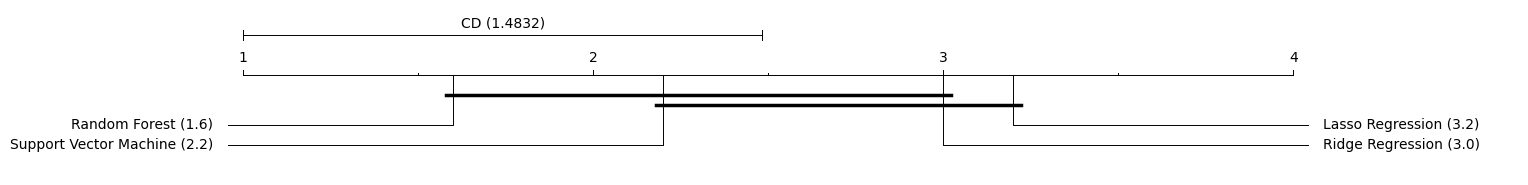

In [32]:
from statds.no_parametrics import nemenyi
num_cases = dataset.shape[0]
ranks_values, critical_distance_nemenyi, figure = nemenyi(rankings, num_cases, alpha)
print(ranks_values)
print(critical_distance_nemenyi)
figure.show()

,Comparison,Statistic (Z),p-value,Adjusted alpha,Adjusted p-value,alpha,Results
0,Random Forest vs Support Vector Machine,1.039230,0.298698,0.016667,0.896093,0.05,H0 is accepted
1,Random Forest vs Lasso Regression,2.771281,0.005584,0.016667,0.016751,0.05,H0 is rejected
2,Random Forest vs Ridge Regression,2.424871,0.015314,0.016667,0.045941,0.05,H0 is rejected


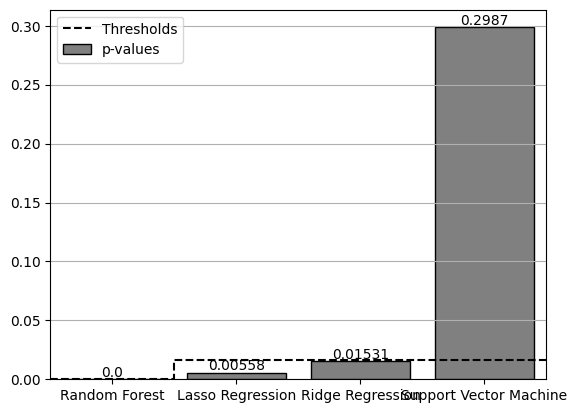

In [35]:
from statds.no_parametrics import bonferroni
num_cases = dataset.shape[0]
results, figure = bonferroni(rankings, num_cases, alpha, control = "Random Forest", type_rank = "Friedman")
results

It is noticeable that the algorithm most distinct from Random Forest is the Ridge Regression. To scrutinize these differences further, we can analyze the results using a Wilcoxon test. This analysis can confirm, with an alpha level of 0.05, that there are indeed significant differences between these two algorithms. Employing the Wilcoxon test, known for its efficacy in non-parametric pairwise comparisons, provides a robust method to statistically validate the observed disparities between Random Forest and Ridge Regression.

In [37]:
from statds.no_parametrics import wilconxon

selected_columns = ["Random Forest", "Lasso Regression"]
statistic, rejected_value, p_value, hypothesis = wilconxon(dataset[selected_columns], alpha)
print(hypothesis)
print(f"Statistic {statistic}, Rejected Value {rejected_value}, p-value {p_value}")

Same distributions (fail to reject H0) with alpha 0.05
Statistic 9.0, Rejected Value 8, p-value None


### Conclusion

After conducting this comprehensive study, we can conclude that, at a significance level of 0.05 (alpha), these algorithms do exhibit significant differences overall. This nuanced insight highlights the importance of context and specific comparative analyses in understanding the relative strengths and weaknesses of different machine learning algorithms.